In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# DEFINIÇÃO DOS DADOS: INPUT LAYERS (1), HIDDEN LAYERS (32), OUTPUT LAYERS (1)
# DADOS DE ENTRADA: INSTANTE DE TEMPO (t)
# DADOS DE SAÍDA:   POSIÇÃO EM RELAÇÃO AO INSTANTE DE TEMPO (x)

# FUNÇÃO QUE REGE O SISTEMA: x(t)=Ae^(-βt)cos(ω1t + φ); ω1 = sqrt(ω² - β²)

In [3]:
def solution(w0, Amplitude, Phase, Size, TimeInterval):
    
    #x(t) = A*np.exp(-Beta*time)*np.cos(w1*t + phase)
    
    x = []
    tempo = []
    for iter in range(Size):
        t = (TimeInterval * iter)
        if (t == 0): 
            t+=0.001
    
        tempo.append(t)

        xt = Amplitude * (1/(w0*t)) * np.sin(w0*t + Phase)
        
        x.append(xt)

    x = np.array(x, dtype=np.float16)
    t = np.array(t, dtype=np.float16)

    return x, tempo

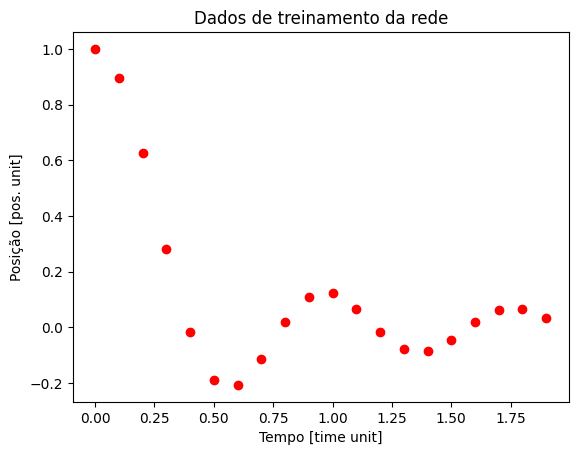

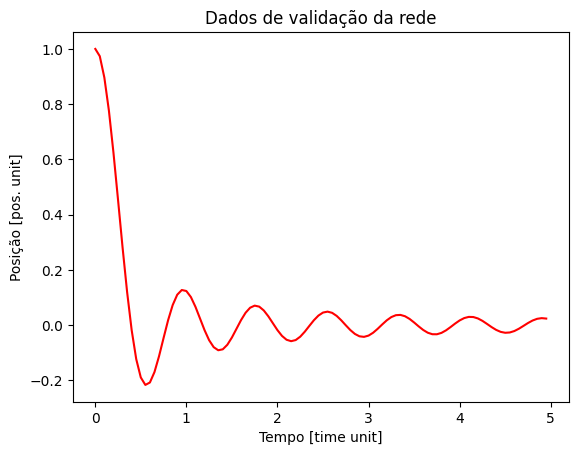

α: 2.000, k: 64.000


In [4]:
W0   = 8.00
A    = 1.00
ALPHA = 2.00
FASE = 0.00
time_units = 2
DT   = 0.1
SIZE =  (int)(time_units/DT)

#OZEREN BC: X0 = 1, V0 = 0, ALPHA = 2, M0 = 1, W0 = 8

x, t = solution(W0, A, FASE, SIZE, DT)

time_units = 5
DT   = 0.05
SIZE =  (int)(time_units/DT)
vx, vt = solution(W0, A, FASE, SIZE, DT)


plt.plot(t, x, 'ro')
plt.title('Dados de treinamento da rede')
plt.xlabel('Tempo [time unit]')
plt.ylabel('Posição [pos. unit]')
plt.show()

plt.plot(vt, vx, 'r-')
plt.title('Dados de validação da rede')
plt.xlabel('Tempo [time unit]')
plt.ylabel('Posição [pos. unit]')
plt.show()

# VALOR DE TF = 6 [TIME UNITS]
# VALOR DE TP = 15[TIME UNITS]

print(f'α: {ALPHA :.3f}, k: {W0**2  :.3f}')

In [5]:
train_dataframe = pd.DataFrame({'T': t, 'X': x})
validation_dataframe = pd.DataFrame({'T': vt, 'X': vx})

savet = 'training-oha' # define o arquivo como treinamento ou teste
savev = 'validation-oha'

savetpkl = savet+'.pkl' #.pkl responde melhor ao pandas do que o .csv
savevpkl = savev+'.pkl'

train_dataframe.to_pickle(savetpkl)
validation_dataframe.to_pickle(savevpkl)